# Employee Retention Forecast - Model
---

## About the Dataset
**Data Sources**: <br>
- **CurrentEmployeeData**: Contains information about current employees
- **NewEmployeeData**: Contains data on new employees for prediction purposes

**Dataset Features**:
- **satisfaction_level**: Employee's job satisfaction level
- **last_evaluation**: Last performance evaluation score
- **number_project**: Number of projects assigned
- **average_montly_hours**: Average monthly working hours
- **time_spend_company**: Years spent at the company
- **Work_accident**: Whether the employee had a work accident
- **promotion_last_5years**: Whether the employee was promoted in the last 5 years
- **Departments**: Employee's department
- **salary**: Employee's salary level (low, medium, high)
- **Quit_the_Company**: Target variable indicating whether the employee left the company

## Table of Contents
- Data Import
- Model Development
- Model Deployment
- Data Export

## Data Import
- Authentication and client setup
- Dataset and table retrieval from BigQuery
- Data conversion into DataFrames

In [ ]:
# Libraries
from google.cloud import bigquery
from google.colab import auth

In [ ]:
# Authentication
auth.authenticate_user()

# Initializing the project id and client
project_id = 'churn-cloud-project-429615'
client = bigquery.Client(project=project_id, location='US')

In [ ]:
# Retrieving the dataset from BigQuery
emp_dataset_link = client.dataset('EmployeeData', project=project_id)
dataset = client.get_dataset(emp_dataset_link)

# Retrieving the 'CurrentEmployeeData' table from BigQuery
current_table_link = dataset.table('CurrentEmployeeData')
current_table = client.get_table(current_table_link)

# Retrieving the 'NewEmployeeData' table from BigQuery
new_table_link = dataset.table('NewEmployeeData')
new_table = client.get_table(new_table_link)

# Converting the tables to dataframes
current_df = client.list_rows(table=current_table).to_dataframe()
new_df = client.list_rows(table=new_table).to_dataframe()

In [ ]:
# Displaying summary of current_df
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# Displaying summary of new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     100 non-null    float64
 1   last_evaluation        100 non-null    float64
 2   number_project         100 non-null    Int64  
 3   average_montly_hours   100 non-null    Int64  
 4   time_spend_company     100 non-null    Int64  
 5   Work_accident          100 non-null    Int64  
 6   Quit_the_Company       100 non-null    Int64  
 7   promotion_last_5years  100 non-null    Int64  
 8   Departments            100 non-null    object 
 9   salary                 100 non-null    object 
 10  employee_id            100 non-null    object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 9.3+ KB


## Model Development
- **Model Setup**: Configuring PyCaret with "CurrentEmployeeData" df
- **Model Comparison**: Evaluating various classification models
- **Model Selection**: Choosing the final model based on evaluation

In [ ]:
# Libraries
from pycaret.classification import *

In [ ]:
# Initializing an environment in PyCaret for modeling
setup(current_df,
      target='Quit_the_Company',
      session_id=123,
      ignore_features=['employee_id'],
      categorical_features= ['Departments', 'salary'])

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [ ]:
# Comparing different classification models available in PyCaret and ranking them
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9886,0.9912,0.9584,0.9934,0.9756,0.9681,0.9684,0.9350
lightgbm,Light Gradient Boosting Machine,0.9856,0.9932,0.9536,0.9856,0.9693,0.9599,0.9602,0.7080
xgboost,Extreme Gradient Boosting,0.9854,0.9922,0.9584,0.9801,0.9691,0.9596,0.9597,0.3270
et,Extra Trees Classifier,0.9832,0.9901,0.9461,0.9831,0.9641,0.9532,0.9536,0.9410
gbc,Gradient Boosting Classifier,0.9766,0.9884,0.9313,0.9694,0.9499,0.9346,0.9350,1.3260
dt,Decision Tree Classifier,0.9747,0.9683,0.9560,0.9392,0.9474,0.9307,0.9309,0.2530
ada,Ada Boost Classifier,0.9572,0.9809,0.9061,0.9138,0.9097,0.8816,0.8818,0.4440
knn,K Neighbors Classifier,0.9333,0.9666,0.9185,0.8230,0.8680,0.8236,0.8259,0.2800
qda,Quadratic Discriminant Analysis,0.8583,0.9101,0.8337,0.6671,0.7387,0.6437,0.6534,0.2320
lr,Logistic Regression,0.7844,0.8167,0.3244,0.5873,0.4174,0.2985,0.3185,1.3210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
# Using Random Forest to train the model with the training dataset
rf_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9914,0.9946,0.9681,0.9959,0.9818,0.9762,0.9764
1,0.9933,0.9900,0.9721,1.0000,0.9859,0.9815,0.9817
2,0.9895,0.9930,0.9680,0.9878,0.9778,0.9709,0.9710
3,0.9857,0.9923,0.9520,0.9876,0.9695,0.9601,0.9604
4,0.9895,0.9890,0.9600,0.9959,0.9776,0.9708,0.9710
5,0.9886,0.9921,0.9560,0.9958,0.9755,0.9681,0.9684
6,0.9886,0.9936,0.9560,0.9958,0.9755,0.9681,0.9684
7,0.9819,0.9863,0.9440,0.9793,0.9613,0.9495,0.9498
8,0.9857,0.9885,0.9440,0.9958,0.9692,0.9599,0.9605


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Model Insights & Rationale:
**Model Setup**: <br>Ignored 'employee_id' as it is a unique identifier and irrelevant for prediction. Labeled categorical features so that the model can capture department-specific and salary-related patterns correctly.

**Model Comparison**: <br>Models were evaluated primarily based on accuracy, recall, and precision because:
- **Accuracy**: Ensures overall reliability of predictions
- **Recall**: Identifies at-risk employees, minimizing false negatives
- **Precision**: Ensures positive predictions are accurate, minimizing false positives

Focusing on these metrics provides a balanced evaluation, ensuring the model accurately identifies and addresses employee churn while minimizing incorrect predictions.

**Model Selection**: <br>Ultimately, Random Forest was selected due to its top performance across key metrics:
- **Accuracy**: 0.9886
- **Recall**: 0.9584
- **Precision**: 0.9934

**Additional reasons why Random Forest was the top choice**:
- Consistently high mean scores across all folds indicate the model's reliability in making accurate predictions
- The low standard deviation reflects the model's stability and consistency, minimizing variability in predictions

## Model Deployment
- Test set predictions
- New data predictions

In [ ]:
# Using the trained model to make predictions on the "current_df" test set that was not used during training
current_predictions = predict_model(rf_classifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9909,0.9664,0.9933,0.9797,0.9734,0.9736


In [ ]:
# Using the trained model to make predictions on the "new_df" dataset containing new employee data
new_predictions = predict_model(rf_classifier, data = new_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9300,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# Displaying summary of current_predictions
current_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 6949 to 14769
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     4502 non-null   float32 
 1   last_evaluation        4502 non-null   float32 
 2   number_project         4502 non-null   Int64   
 3   average_montly_hours   4502 non-null   Int64   
 4   time_spend_company     4502 non-null   Int64   
 5   Work_accident          4502 non-null   Int64   
 6   promotion_last_5years  4502 non-null   Int64   
 7   Departments            4502 non-null   category
 8   salary                 4502 non-null   category
 9   Quit_the_Company       4502 non-null   Int64   
 10  prediction_label       4502 non-null   int64   
 11  prediction_score       4502 non-null   float64 
dtypes: Int64(6), category(2), float32(2), float64(1), int64(1)
memory usage: 387.4 KB


In [ ]:
# Displaying summary of new_predictions
new_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     100 non-null    float32 
 1   last_evaluation        100 non-null    float32 
 2   number_project         100 non-null    Int64   
 3   average_montly_hours   100 non-null    Int64   
 4   time_spend_company     100 non-null    Int64   
 5   Work_accident          100 non-null    Int64   
 6   promotion_last_5years  100 non-null    Int64   
 7   Departments            100 non-null    category
 8   salary                 100 non-null    category
 9   employee_id            100 non-null    category
 10  Quit_the_Company       100 non-null    Int64   
 11  prediction_label       100 non-null    int64   
 12  prediction_score       100 non-null    float64 
dtypes: Int64(6), category(3), float32(2), float64(1), int64(1)
memory usage: 13.4 KB


## Data Export
- Exporting new_predictions data to BigQuery
- Visualizing feature importance of the model
- Generating a table of features and their importance
- Exporting feature importance data to Big Query

In [ ]:
# Libraries
import pandas as pd

In [ ]:
# Exporting new_predictions data back to BigQuery
new_predictions.to_gbq('EmployeeData.NewPredictionData',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 674.54it/s]


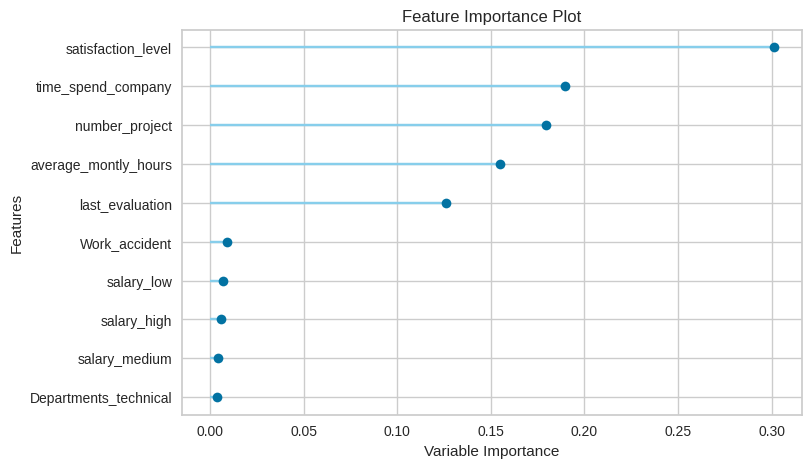

In [ ]:
# Visualizing feature importance of the model
plot_model(rf_classifier,plot='feature')

In [ ]:
# Generating a table of features and their importance
feature_table = pd.DataFrame(zip(rf_classifier.feature_names_in_, rf_classifier.feature_importances_), columns=['features', 'importance'])
feature_table

,features,importance
0,satisfaction_level,0.301107
1,last_evaluation,0.125924
2,number_project,0.179201
3,average_montly_hours,0.155114
4,time_spend_company,0.189781
5,Work_accident,0.008876
6,promotion_last_5years,0.001536
7,Departments_accounting,0.001949
8,Departments_support,0.002904
9,Departments_technical,0.003675


In [ ]:
# Exporting feature importance data to Big Query
feature_table.to_gbq('EmployeeData.FeatureData',
                     project_id,
                     chunksize=None,
                     if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]
